In [1]:
#-----------Linear Regression---------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings


In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


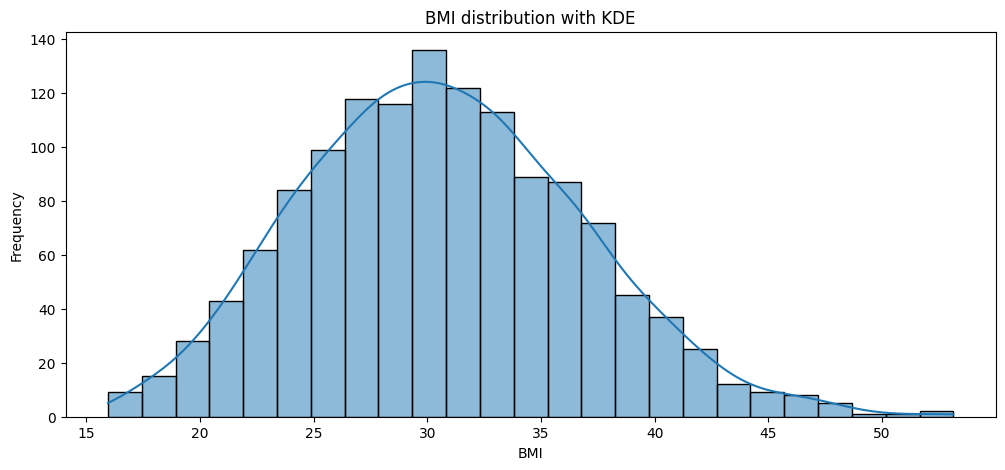

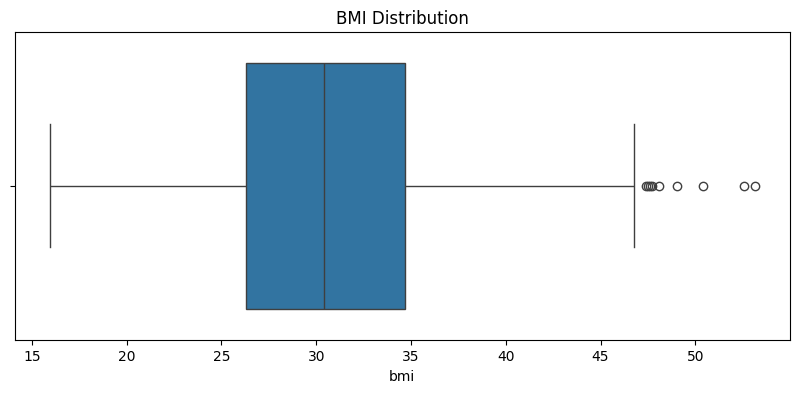

In [9]:
plt.figure(figsize=(12,5))

sns.histplot(df["bmi"], kde=True)
plt.title("BMI distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x = df['bmi'])
plt.title("BMI Distribution")
plt.show()

In [10]:
# Remove the outliers

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 13.7
Upper Bound: 47.290000000000006


In [14]:
# Clipping the outliers

df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

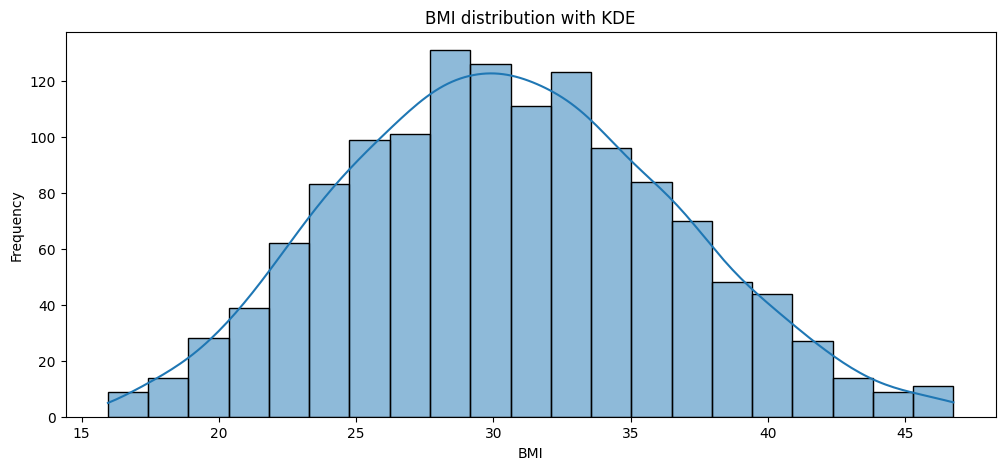

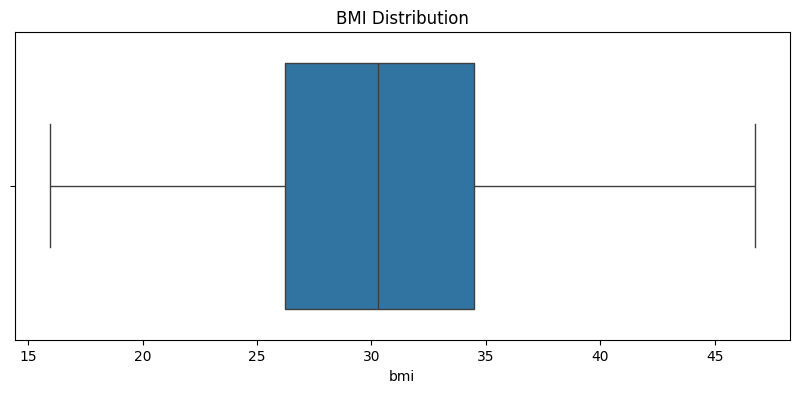

In [16]:

plt.figure(figsize=(12,5))

sns.histplot(df_cleaned["bmi"], kde=True)
plt.title("BMI distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x = df_cleaned['bmi'])
plt.title("BMI Distribution")
plt.show()

In [18]:

# Encoding ---  (text---->numeric)
# used one hot encoding

df_cleaned = pd.get_dummies(df_cleaned,drop_first=True)
df_cleaned

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


<Axes: >

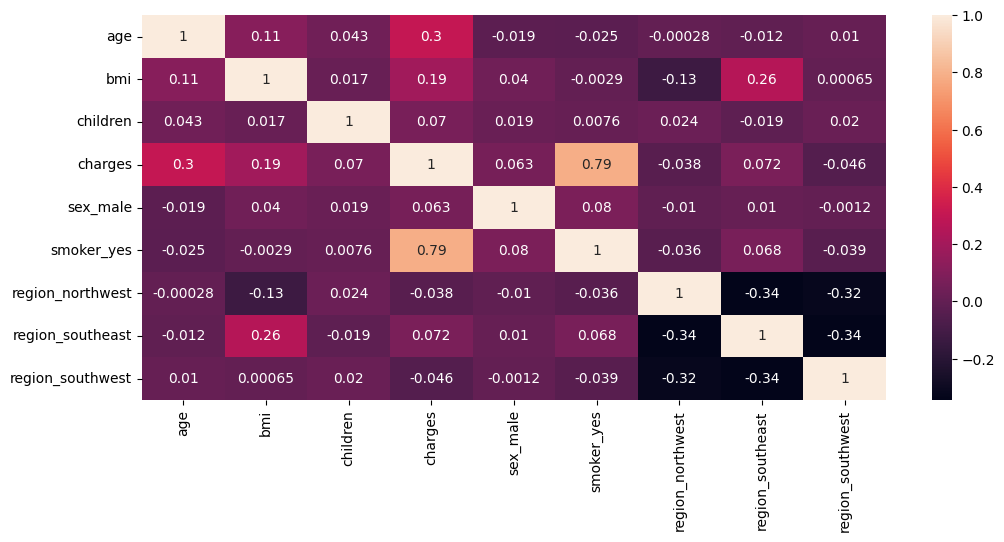

In [21]:
from matplotlib import figure

# Feature Engineering  (removing a unwanted column)

figure  = plt.figure(figsize=(12,5))
sns.heatmap(df_cleaned.corr(),annot=True)


In [23]:

df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [24]:
# x and y

x = df_cleaned[['age', 'bmi', 'smoker_yes']]
y = df_cleaned["charges"]


In [25]:
#train test split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 23)


In [26]:
#training the model

model = LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [28]:

y_pred = model.predict(x_test)  #testing on test data
y_train_pred = model.predict(x_train) # testing on train data


In [29]:
print(f'Testing Result : {mean_squared_error(y_test,y_pred)}')
print(f'Testing Result : {mean_squared_error(y_train,y_train_pred)}')

Testing Result : 31918022.304854628
Testing Result : 37656130.688268535


In [30]:
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(model,f)